In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_excel('/home/nkumar/Downloads/Default.xlsx')

In [3]:
data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
data.default = data['default'].map({'No':0, 'Yes':1})
data.student = data['student'].map({'No':0, 'Yes':1})

In [5]:
data.head()

,Unnamed: 0,default,student,balance,income
0,1,0,0,729.526495,44361.625074
1,2,0,1,817.180407,12106.134700
2,3,0,0,1073.549164,31767.138947
3,4,0,0,529.250605,35704.493935
4,5,0,0,785.655883,38463.495879


In [6]:
default = data.default.values.reshape(-1,1)
student = data.student.values.reshape(-1,1)

In [7]:
scaler = StandardScaler()

In [9]:
balance = data.balance.values.reshape(-1,1)
income = data.income.values.reshape(-1,1)

In [10]:
balance = scaler.fit_transform(balance)
income = scaler.fit_transform(income)

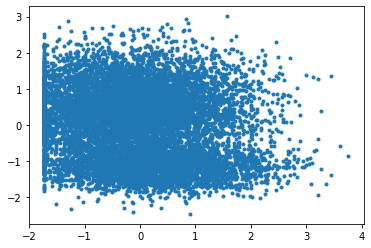

In [25]:
plt.scatter(balance, income, marker = '.')

(array([7056.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2944.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

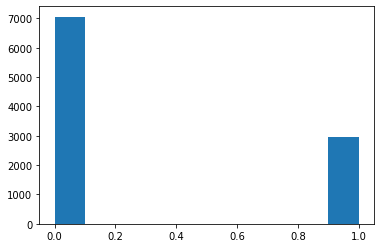

In [21]:
plt.hist(student, label = 'student')

(array([9667.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         333.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

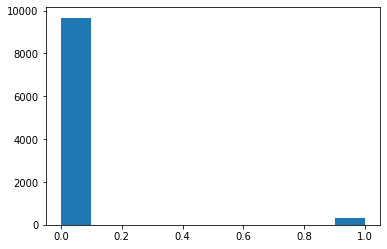

In [22]:
plt.hist(default, label = 'default')

In [78]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,[2,3,4]], default)

In [79]:
model = LogisticRegression()
model.fit(x_train, y_train)

/home/nkumar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nkumar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_pred = model.predict(x_test)

In [81]:
confusion_matrix(y_test, y_pred)

array([[2424,    1],
       [  75,    0]])

In [82]:
(1670+661)/(1670+661+71+98)

0.9324

In [83]:
model.score(x_test, y_test)

0.9696

In [123]:
X = data.iloc[:, [2,3,4]].values

------

**MORE DETAILED**

In [125]:
sm1 = sm.add_constant(X)
sm2 = sm.Logit(data.default.values.reshape(-1,1), X)

In [129]:
sm1

array([[1.00000000e+00, 0.00000000e+00, 7.29526495e+02, 4.43616251e+04],
       [1.00000000e+00, 1.00000000e+00, 8.17180407e+02, 1.21061347e+04],
       [1.00000000e+00, 0.00000000e+00, 1.07354916e+03, 3.17671389e+04],
       ...,
       [1.00000000e+00, 0.00000000e+00, 8.45411989e+02, 5.86361570e+04],
       [1.00000000e+00, 0.00000000e+00, 1.56900905e+03, 3.66691124e+04],
       [1.00000000e+00, 1.00000000e+00, 2.00922183e+02, 1.68629523e+04]])

In [126]:
sm3 = sm2.fit()

Optimization terminated successfully.
         Current function value: 0.124277
         Iterations 9


In [127]:
sm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 11 Dec 2019   Pseudo R-squ.:                  0.1490
Time:                        15:18:15   Log-Likelihood:                -1242.8
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 3.274e-95
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.7531      0.153    -24.580      0.000      -4.052      -3.454
x2             0.0028      0.000     22.291      0.000       0.003       0.003
x3            -0.0002   5.18e-06    -33.672      0.000      -0.000      -0.000
==============================================================================
"""

In [128]:
sm3.params

array([-3.75312637e+00,  2.79548074e-03, -1.74318008e-04])

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
classifier = GaussianNB()

In [132]:
classifier.fit(x_train, y_train)

/home/nkumar/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [133]:
y_pred = classifier.predict(x_test)

In [134]:
confusion_matrix(y_test, y_pred)

array([[2417,    8],
       [  54,   21]])

In [135]:
classifier.score(x_test, y_test)

0.9752